# ME 364 Midterm Project - Part 1

For this part, you will use the latest version of the United States Wind Turbine Database (USWTDB),
which you can download from https://eerscmap.usgs.gov/uswtdb/assets/data/uswtdbCSV.zip.
You can find out more about the data and the dictionary file describing the parameters on this page
https://www.sciencebase.gov/catalog/item/6001e327d34e592d8671fae0 (dictionary file name
is “EntityandAttribute DataDictionary.csv”) Use this data set to answer the following questions.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Midterm%20Project/Part%201/uswtdb_v4_3_20220114.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")

**1) How many rows do we have in this data set? Find the number of missing values in the data
set. Find and report the number of missing values in each column.**

In [4]:
# Number of rows in dataset
rows = len(df.index)
print("Number of rows in dataset: {}".format(rows))

# Number of missing values in dataset
missing = df.isnull().sum()
print("Total number of values missing: {}".format(missing.sum()))
print("Number of missing values in each column:")
print(missing)

Number of rows in dataset: 70808
Total number of values missing: 168610
Number of missing values in each column:
case_id              0
faa_ors           5792
faa_asn           5122
usgs_pr_id       32545
eia_id            5793
t_state              0
t_county             0
t_fips               0
p_name               0
p_year             613
p_tnum               0
p_cap             4482
t_manu            5640
t_model           5777
t_cap             5480
t_hh              6180
t_rd              5934
t_rsa             5934
t_ttlh            6180
retrofit             0
retrofit_year    64822
t_conf_atr           0
t_conf_loc           0
t_img_date        8316
t_img_srce           0
xlong                0
ylat                 0
dtype: int64


**2) In which states and which counties the highest capacity turbines are installed?**

In [5]:
# Identify the maximum capacity of turbines in the dataset
max_cap = df['t_cap'].max()

# Get data for max-capacity turbines
max_cap_data = df[df['t_cap'] == max_cap]

# Filter out duplicate lcoations
max_cap_locations = max_cap_data.drop_duplicates(subset=['t_state','t_county'])

# Print list of unique states/counties housing max-capacity turbines 
print(max_cap_locations[['t_state','t_county']].to_string(index=False))

t_state           t_county
     RI  Washington County
     VA Northampton County


**3) Based on the data available, where was the first wind turbine project installed in the US?
(provide the state and county and the year)**

In [6]:
# Sort entries by year
df.sort_values(by=['p_year'])

# Retrueve information from first entry
print(df.head(1)[['t_state','t_county','p_year']].to_string(index=False))

t_state    t_county  p_year
     CA Kern County  1987.0


**4) How many projects were installed and become operational during 2020? Which state had the
most number of projects during 2020? How many? Which had the least number of projects?
How many?**

In [7]:
# Create new dataframe of only 2020 entries
new_turbines = df[df['p_year']==2020]

# Limit to one entry per project
new_projects = new_turbines.drop_duplicates(subset=['p_name'])

# Number of new projects installed in 2020
num_projects = len(new_projects.index)
print("Total new projects installed in 2020: {}".format(num_projects))

# States with most 2020 project installations
num_projects_by_state = new_projects['t_state'].value_counts()
most_new_projects = num_projects_by_state.head(1).to_dict()
print("State with most project installations in 2020:")
print(most_new_projects)

# The fewest 2020 project installations for any state was zero
# Tied between several states, some of which are not preent in the database at all

# List of all states
all_states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

# List of states with no 2020 project installations
no_proj_states = [x for x in all_states if x not in pd.unique(new_projects['t_state'])]
print("The following states had zero new project installations in 2020:")
print(no_proj_states)

Total new projects installed in 2020: 128
State with most project installations in 2020:
{'TX': 22}
The following states had zero new project installations in 2020:
['AK', 'AL', 'AR', 'CT', 'DC', 'DE', 'FL', 'GA', 'ID', 'KY', 'LA', 'MA', 'MD', 'MS', 'NC', 'NH', 'NJ', 'NV', 'PA', 'RI', 'SC', 'TN', 'UT', 'VA', 'VT', 'WI']


**5) How many turbines have been installed in California? How many turbines have been installed
in New York?**

In [8]:
ca_turbines = df[df['t_state']=='CA']
ny_turbines = df[df['t_state']=='NY']

n_t_ca = len(ca_turbines.index)
n_t_ny = len(ny_turbines.index)

print("Number of turbines installed in California: {}".format(n_t_ca))
print("Number of turbines installed in New York: {}".format(n_t_ny))

Number of turbines installed in California: 6065
Number of turbines installed in New York: 1197


**6) How many projects have been installed in California? How many projects have been installed
in New York? What are the projects with most number of turbines in each of these states?
How many turbines are installed in these projects?**

In [9]:
ca_projects = ca_turbines.drop_duplicates(subset= ['p_name'])
ny_projects = ny_turbines.drop_duplicates(subset= ['p_name'])

n_p_ca = len(ca_projects.index)
n_p_ny = len(ny_projects.index)

print("Number of projects installed in California: {}".format(n_p_ca))
print("Number of projects installed in New York: {}".format(n_p_ny))

Number of projects installed in California: 128
Number of projects installed in New York: 44


**7) Provide one histogram showing the distribution of turbines’ rotor diameters and another histogram showing the distribution of turbines’ capacities.**

Text(0.5, 1.0, 'Turbine Capacity Distribution')

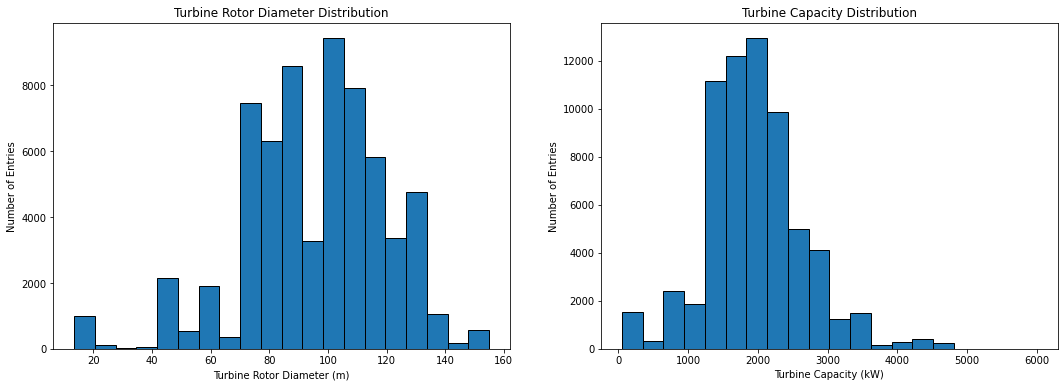

In [10]:
# Create figure
fig, axs = plt.subplots(1,2,figsize=(18,6))

# Plot 1: distribution of turbines' rotor diameters
axs[0].hist(df['t_rd'], bins=20, ec='k')
axs[0].set_xlabel("Turbine Rotor Diameter (m)")
axs[0].set_ylabel("Number of Entries")
axs[0].set_title("Turbine Rotor Diameter Distribution")

# Plot 2: distribution of turbines' capacities
axs[1].hist(df['t_cap'], bins=20, ec='k')
axs[1].set_xlabel("Turbine Capacity (kW)")
axs[1].set_ylabel("Number of Entries")
axs[1].set_title("Turbine Capacity Distribution")

**8) Visualize the annual installed wind turbine capacity in the US. Use the appropriate type of
plot that can effectively show the trend and communicate it well.**

<AxesSubplot:title={'center':'National Turbine Capacity by Year'}, xlabel='Year'>

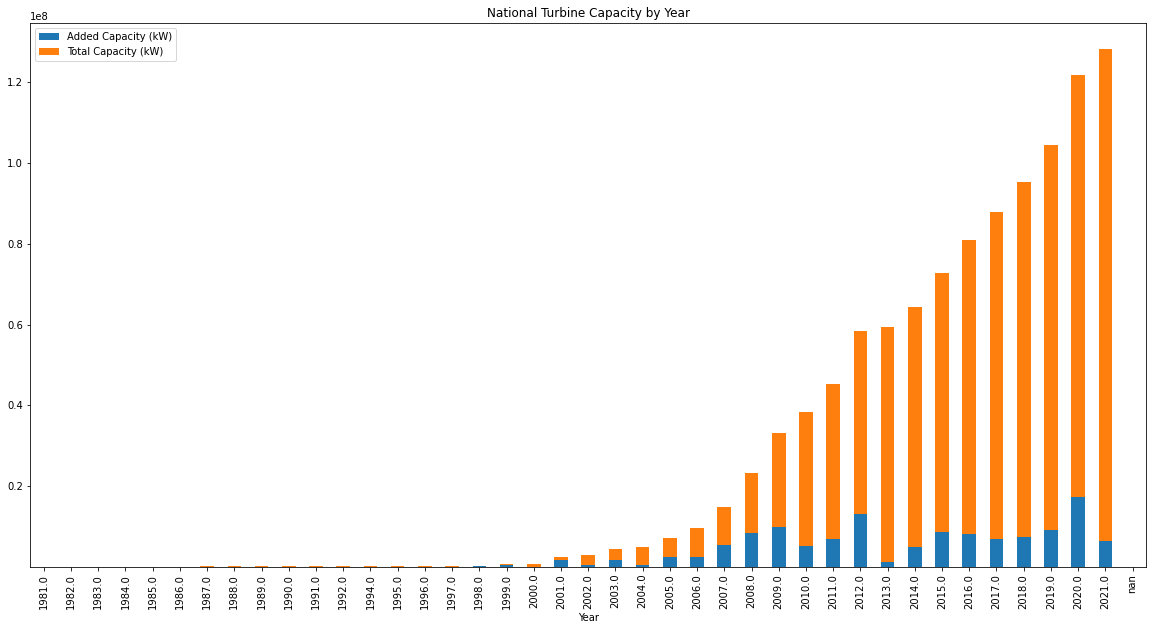

In [59]:
# Create a new dataframe containing data on the annual national turbine turbine capacity created

# List and sort all unique years present in the database
years = pd.unique(df['p_year'])
years.sort()

# Compile total new turbine capactity added each year
new_capacity = [df.loc[df['p_year'] == yr, 't_cap'].sum() for yr in years]

# Compile total turbine capacity nationally at the start of each year
prev_capacity = [df.loc[df['p_year'] < yr, 't_cap'].sum() for yr in years]

# Create new dataframe from turbine capacity data
annual_cap_data = {
    "Year": years,
    "Added Capacity (kW)": new_capacity,
    "Total Capacity (kW)": prev_capacity
}
annual_cap = pd.DataFrame(annual_cap_data)

annual_cap.plot(x='Year', kind='bar', stacked=True,
        title='National Turbine Capacity by Year', figsize=(20,10))

**9) Create a pivot table showing total turbine capacity for CA, IA, KS, OK, TX during years
2017, 2018, 2019, and 2020.**

**10) What variables in the data set are correlated with a Pearson correlation coefficient greater
than 0.87? Do the correlations between these variables make sense to you?**

**11) If you want to use one parameter to predict turbine capacity, what would it be? How did you
decide about it? If you can use two parameters to predict turbine capacity, what would they
be? How about three parameters? Explain how you decide about these parameters.**